## TP Integrador - Series de Tiempo

#### Alumno: Lucas Rivela
#### Cohorte: 5
#### Profesores: Magdalena Bouza y Carlos Romano

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa as tsa
from scipy import stats
from scipy.optimize import curve_fit
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, acf, kpss

In [2]:
pd.set_option('display.max_columns', None)

##### Entrega 1

- Graficar una serie a partir de un dataset relevante. Describir observaciones.
- Descomponer una serie de tiempo usando el modelo aditivo de cuatro componentes. (statsmodel -> decompose en 4 partes: tendencia, cíclica, estacional y ruido)
- Extraer la tendencia y ajustar un modelo determinístico. Explicar su relación con el contexto. Obtener conclusiones acerca de la validez del modelo.
- Evaluar si la serie original es estacionaria. Aplicar transformaciones (preprocesamiento), graficar autocorrelación, autocorrelación parcial y extraer conclusiones.

In [3]:
df_sube21 = pd.read_csv('./dat-ab-usos-2021.csv')
df_sube21.head()

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR
0,2021-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1466,NO
1,2021-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,625,NO
2,2021-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1119,NO
3,2021-01-01,AUTOBUSES BUENOS AIRES S.R.L. – TRANSPORTE LAR...,BS_AS_LINEA_514,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,ALMIRANTE BROWN,2813,NO
4,2021-01-01,EL URBANO SRL,BS_AS_LINEA_522,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,LANUS,99,NO


In [4]:
df_sube22 = pd.read_csv('./dat-ab-usos-2022.csv')
df_sube22.head()

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR
0,2022-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,10,NO
1,2022-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,19,NO
2,2022-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1418,NO
3,2022-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,675,NO
4,2022-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1906,NO


##### Me fijo si hay Nulls

In [5]:
df_sube21.isna().sum()

DIA_TRANSPORTE        0
NOMBRE_EMPRESA        0
LINEA                 0
AMBA                  0
TIPO_TRANSPORTE       0
JURISDICCION       2974
PROVINCIA          2974
MUNICIPIO          2974
CANTIDAD              0
DATO_PRELIMINAR       0
dtype: int64

In [6]:
df_sube22.isna().sum()

DIA_TRANSPORTE        0
NOMBRE_EMPRESA        0
LINEA                 0
AMBA                  0
TIPO_TRANSPORTE       0
JURISDICCION       1731
PROVINCIA          1731
MUNICIPIO          1731
CANTIDAD              0
DATO_PRELIMINAR       0
dtype: int64

En ambos casos vemos nulls para las columnas Jurisdiccion, Provincia y Municipio. De todos modos serán ignoradas para el análisis de la serie.

In [7]:
df_sube21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410644 entries, 0 to 410643
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   DIA_TRANSPORTE   410644 non-null  object
 1   NOMBRE_EMPRESA   410644 non-null  object
 2   LINEA            410644 non-null  object
 3   AMBA             410644 non-null  object
 4   TIPO_TRANSPORTE  410644 non-null  object
 5   JURISDICCION     407670 non-null  object
 6   PROVINCIA        407670 non-null  object
 7   MUNICIPIO        407670 non-null  object
 8   CANTIDAD         410644 non-null  int64 
 9   DATO_PRELIMINAR  410644 non-null  object
dtypes: int64(1), object(9)
memory usage: 31.3+ MB


In [8]:
df_sube22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291462 entries, 0 to 291461
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   DIA_TRANSPORTE   291462 non-null  object
 1   NOMBRE_EMPRESA   291462 non-null  object
 2   LINEA            291462 non-null  object
 3   AMBA             291462 non-null  object
 4   TIPO_TRANSPORTE  291462 non-null  object
 5   JURISDICCION     289731 non-null  object
 6   PROVINCIA        289731 non-null  object
 7   MUNICIPIO        289731 non-null  object
 8   CANTIDAD         291462 non-null  int64 
 9   DATO_PRELIMINAR  291462 non-null  object
dtypes: int64(1), object(9)
memory usage: 22.2+ MB


In [9]:
df21 = df_sube21.drop(columns=['NOMBRE_EMPRESA', 'LINEA', 'AMBA', 'TIPO_TRANSPORTE', 'JURISDICCION', 'PROVINCIA', 'MUNICIPIO', 'DATO_PRELIMINAR'], axis=1)
df21.head()

,DIA_TRANSPORTE,CANTIDAD
0,2021-01-01,1466
1,2021-01-01,625
2,2021-01-01,1119
3,2021-01-01,2813
4,2021-01-01,99


In [10]:
df22 = df_sube22.drop(columns=['NOMBRE_EMPRESA', 'LINEA', 'AMBA', 'TIPO_TRANSPORTE', 'JURISDICCION', 'PROVINCIA', 'MUNICIPIO', 'DATO_PRELIMINAR'], axis=1)
df22.head()

,DIA_TRANSPORTE,CANTIDAD
0,2022-01-01,10
1,2022-01-01,19
2,2022-01-01,1418
3,2022-01-01,675
4,2022-01-01,1906


In [11]:
df21['DIA_TRANSPORTE'] = pd.to_datetime(df21['DIA_TRANSPORTE'])
df22['DIA_TRANSPORTE'] = pd.to_datetime(df22['DIA_TRANSPORTE'])

In [12]:
df = pd.concat([df21, df22], ignore_index=True)
df.head()

,DIA_TRANSPORTE,CANTIDAD
0,2021-01-01,1466
1,2021-01-01,625
2,2021-01-01,1119
3,2021-01-01,2813
4,2021-01-01,99


In [13]:
df.tail()

,DIA_TRANSPORTE,CANTIDAD
702101,2022-09-02,5
702102,2022-09-02,662
702103,2022-09-02,1303
702104,2022-09-02,393
702105,2022-09-02,730


In [14]:
serie = df.groupby(['DIA_TRANSPORTE']).sum()

In [15]:
serie.head()

,CANTIDAD
DIA_TRANSPORTE,
2021-01-01,1178259
2021-01-02,3626837
2021-01-03,2349540
2021-01-04,6352559
2021-01-05,6591339


In [16]:
serie.reset_index(inplace=True)

##### Trabajo con la Serie

In [17]:
serie['Year'] = pd.DatetimeIndex(serie['DIA_TRANSPORTE']).year
serie['Month'] = pd.DatetimeIndex(serie['DIA_TRANSPORTE']).month

serie.head()

,DIA_TRANSPORTE,CANTIDAD,Year,Month
0,2021-01-01,1178259,2021,1
1,2021-01-02,3626837,2021,1
2,2021-01-03,2349540,2021,1
3,2021-01-04,6352559,2021,1
4,2021-01-05,6591339,2021,1


In [18]:
serie.tail()

,DIA_TRANSPORTE,CANTIDAD,Year,Month
605,2022-08-29,12862451,2022,8
606,2022-08-30,13239561,2022,8
607,2022-08-31,13239636,2022,8
608,2022-09-01,12483866,2022,9
609,2022-09-02,6981899,2022,9


Text(0.5, 1.0, 'Viajes por dia')

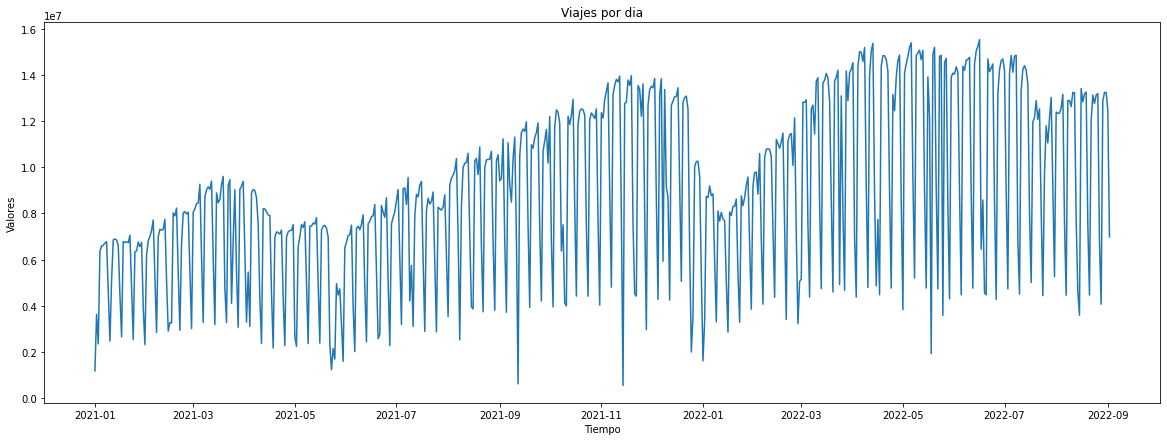

In [19]:
plt.figure(figsize=(20,7))
sns.lineplot(data=serie, x='DIA_TRANSPORTE', y='CANTIDAD')
plt.xlabel('Tiempo')
plt.ylabel('Valores')
plt.title('Viajes por dia')

En esta gráfica se pueden ver la cantidad de transacciones de SUBE por día desde Enero de 2021 hasta Septiembre de 2022.

Si tomamos la serie por cada año, parecería tener una tendencia creciente hacia el final de cada uno. Esto nos podría estar indicando que hay una especie de estacionalidad anual.

Por otro lado, también se pueden ver una especie de "serrucho" que son la cantidad de viajes cayendo en los fines de semana. Esto nos podría estar indicando una estacionalidad semanal.

In [20]:
por_mes = serie.groupby(['Year', 'Month']).sum()
por_mes.reset_index(inplace=True)
por_mes

,Year,Month,CANTIDAD
0,2021,1,167095783
1,2021,2,174180306
2,2021,3,233999339
3,2021,4,193512137
4,2021,5,163014875
5,2021,6,192962361
6,2021,7,228316341
7,2021,8,260555303
8,2021,9,279104810
9,2021,10,301885025


Text(0.5, 1.0, 'Comparacion viajes por mes 2021 vs 2022')

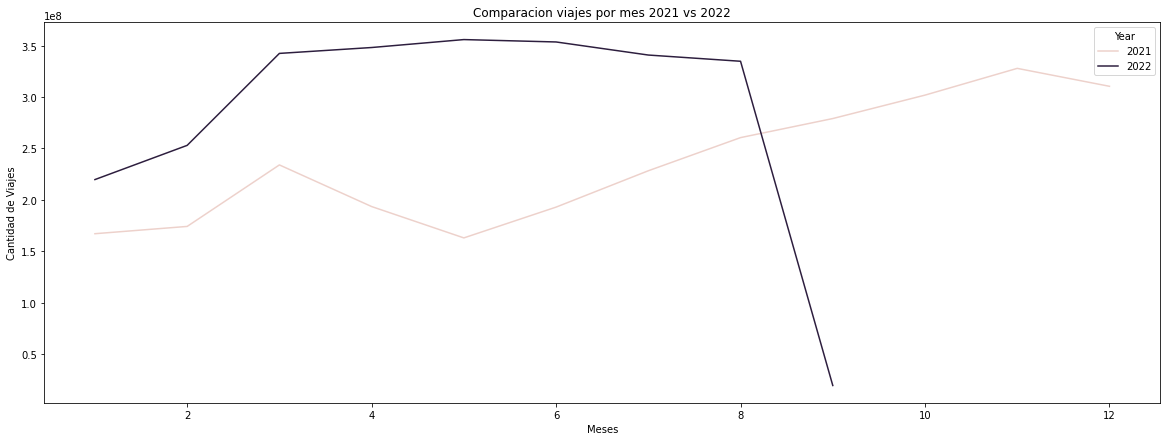

In [21]:
plt.figure(figsize=(20,7))
sns.lineplot(data=por_mes, x='Month', y='CANTIDAD', hue='Year')
plt.xlabel('Meses')
plt.ylabel('Cantidad de Viajes')
plt.title('Comparacion viajes por mes 2021 vs 2022')

En este gráfico podemos ver que en 2022 se hicieron más viajes en todos los meses. 2022 baja en septiembre porque el mes no estaba cerrado al momento de hacer los gráficos. Igualmente era lo esperable ya que 2021 todavía es un año muy pegado al 2020 de pandemia.

2022 parece tener mucha mayor estabilidad en la cantidad de viajes por mes comparado a 2021. Por otro lado en Mayo de 2021 se nota una caída en la cantidad de viajes por el rebrote de Covid que hubo.

También se puede ver que Enero y Febrero son los meses de menor cantidad de viajes (probablemente por las vacaciones).

In [22]:
serie["DayName"] = serie['DIA_TRANSPORTE'].dt.day_name()
serie["WeekDay"] = serie['DIA_TRANSPORTE'].dt.weekday

serie.head()

,DIA_TRANSPORTE,CANTIDAD,Year,Month,DayName,WeekDay
0,2021-01-01,1178259,2021,1,Friday,4
1,2021-01-02,3626837,2021,1,Saturday,5
2,2021-01-03,2349540,2021,1,Sunday,6
3,2021-01-04,6352559,2021,1,Monday,0
4,2021-01-05,6591339,2021,1,Tuesday,1


In [23]:
por_dayofweek = serie.groupby(['Year', 'Month', 'WeekDay', 'DayName']).sum()
por_dayofweek.reset_index(inplace=True)
por_dayofweek.sort_values(['Year', 'Month', 'WeekDay'], ascending=[True, True, True])
por_dayofweek

,Year,Month,WeekDay,DayName,CANTIDAD
0,2021,1,0,Monday,24550817
1,2021,1,1,Tuesday,26568103
2,2021,1,2,Wednesday,27040631
3,2021,1,3,Thursday,26857365
4,2021,1,4,Friday,28369544
...,...,...,...,...,...
137,2022,8,4,Friday,52836199
138,2022,8,5,Saturday,29700767
139,2022,8,6,Sunday,17595340
140,2022,9,3,Thursday,12483866


Text(0.5, 1.0, 'Comparacion viajes por dia de la semana 2021 vs 2022')

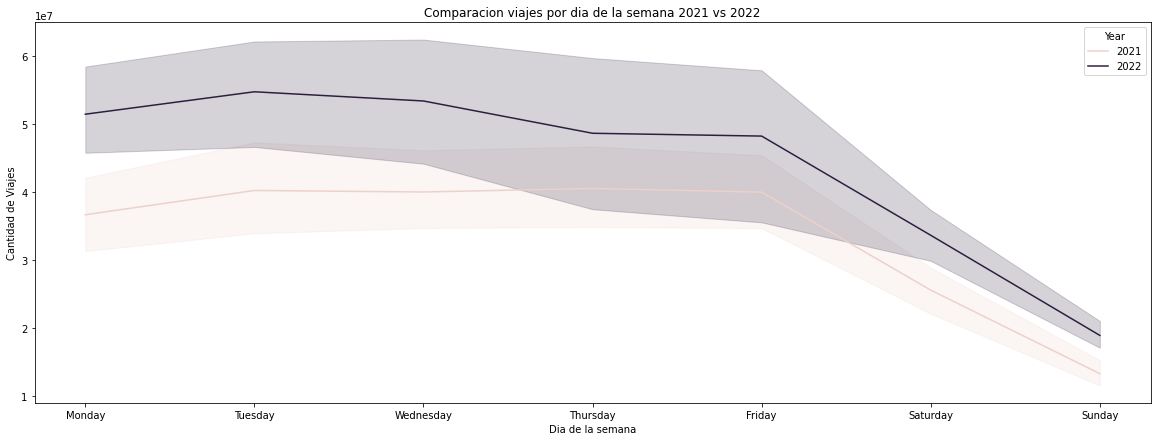

In [24]:
plt.figure(figsize=(20,7))
sns.lineplot(data=por_dayofweek, x='DayName', y='CANTIDAD', hue='Year')
plt.xlabel('Dia de la semana')
plt.ylabel('Cantidad de Viajes')
plt.title('Comparacion viajes por dia de la semana 2021 vs 2022')

En este otro gráfico vemos agrupados los viajes por día de la semana. Se puede ver como la cantidad de viajes cae hacia el final de la semana y se reduce mucho los fines de semana. Como en el gráfico anterior, 2022 le gana en todos los días a 2021.

<AxesSubplot:xlabel='CANTIDAD', ylabel='Count'>

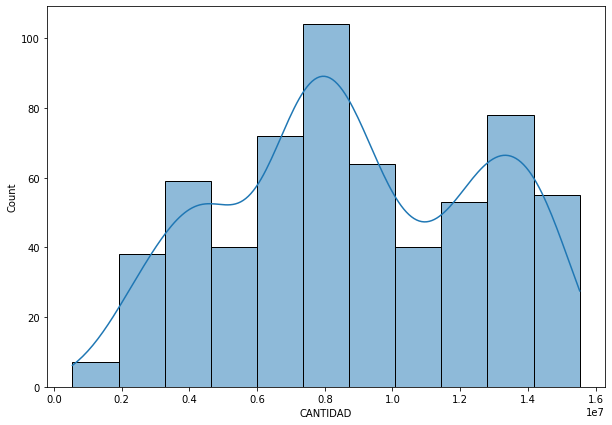

In [25]:
plt.figure(figsize=(10,7))
sns.histplot(data=serie, x='CANTIDAD', kde=True)

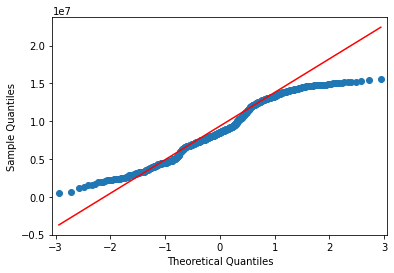

In [26]:
sm.qqplot(serie['CANTIDAD'], line='q')
plt.show()

<AxesSubplot:xlabel='CANTIDAD'>

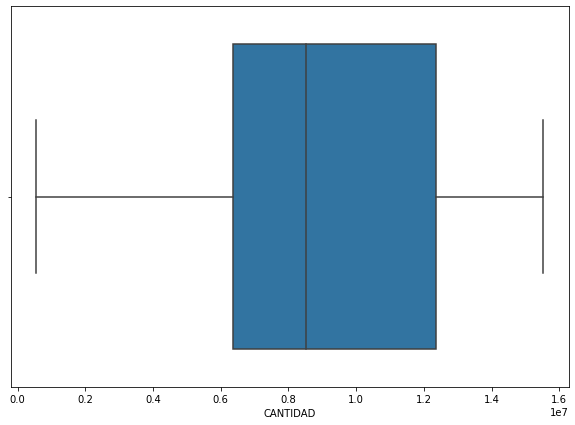

In [27]:
plt.figure(figsize=(10,7))
sns.boxplot(data=serie, x='CANTIDAD')

##### Descompocisión usando el modelo aditivo de 4 componentes

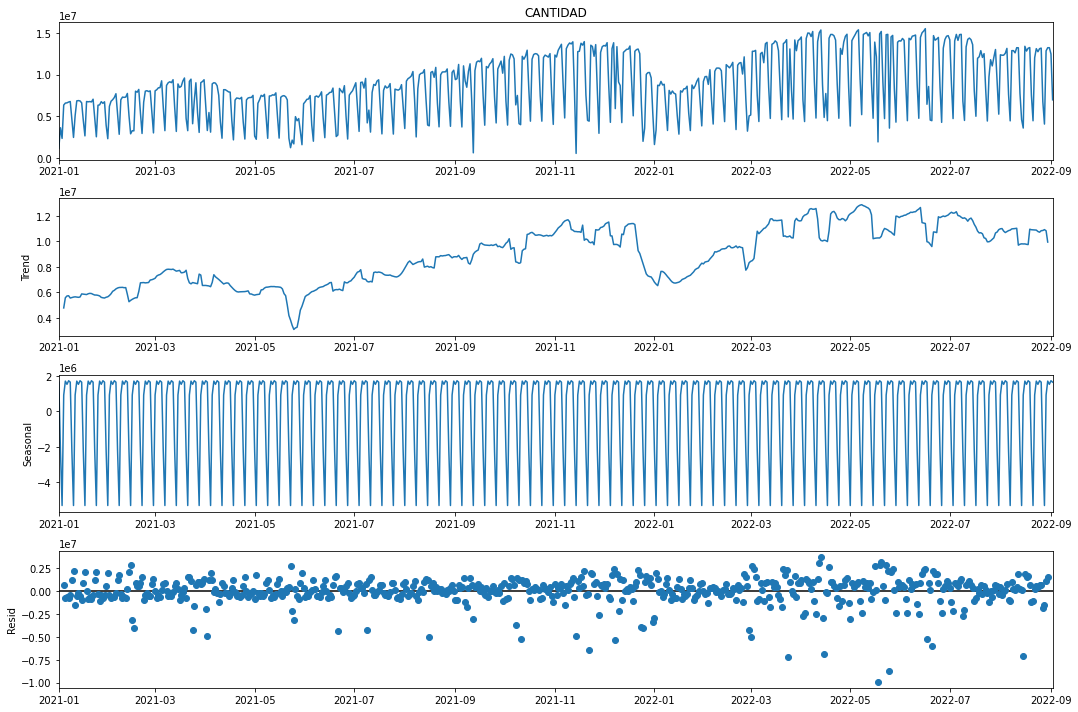

In [28]:

decomp = serie[["DIA_TRANSPORTE","CANTIDAD"]].copy()
decomp["DIA_TRANSPORTE"] = pd.to_datetime(decomp["DIA_TRANSPORTE"])
decomp = decomp.set_index("DIA_TRANSPORTE")
additive = sm.tsa.seasonal_decompose(decomp.CANTIDAD, model='additive')
fig = additive.plot()
fig.set_size_inches(15,10)
fig.tight_layout()
plt.show()

##### Extracción de Tendencia

In [29]:
def lineal(x, a, b):
    return a * x + b

In [30]:
def cuadratica(x, a, b, c):
    return a * x**2 + b * x + c

In [31]:
def cubica(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

In [32]:
def cuartica(x, a, b, c, d, e):
    return a * x**4 + b * x**3 + c * x**2 + d * x + e

In [33]:
def sine(x, a, b, c, d):
    return a * np.sin(b * x - c) + d

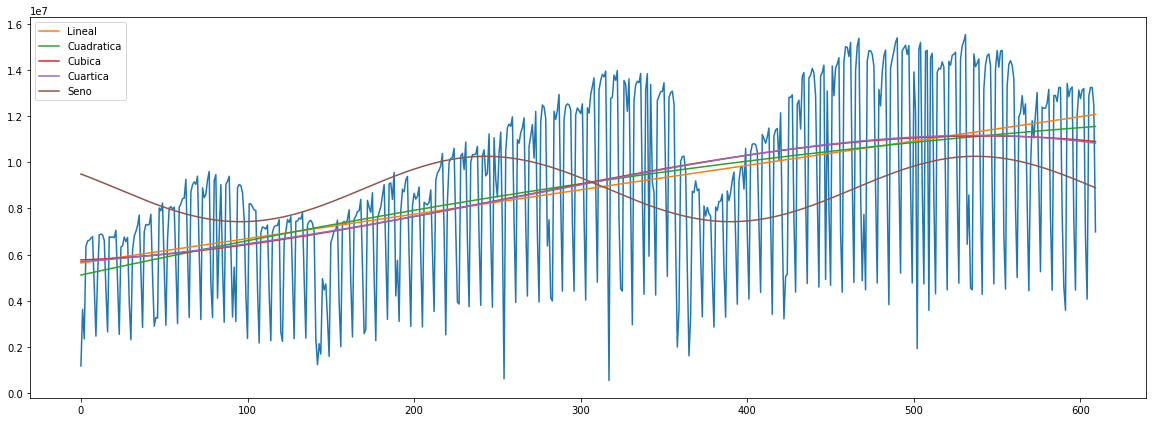

In [34]:
x = np.arange(0, len(serie["DIA_TRANSPORTE"]), 1)
y = serie["CANTIDAD"]

poptl, _ = curve_fit(lineal, x, y)
a, b = poptl
y_lineL = lineal(x, a, b)

popt2 , _ = curve_fit(cuadratica, x, y)
a, b, c = popt2
y_line2 = cuadratica(x, a, b, c)

popt3, _ = curve_fit(cubica, x, y)
a, b, c, d = popt3
y_line3 = cubica(x, a, b, c, d)

popt4, _ = curve_fit(cuartica, x, y)
a, b, c, d, e = popt4
y_line4 = cuartica(x, a, b, c, d, e)

popts, _ = curve_fit(sine, x, y)
a, b, c, d = popts
y_lineS = sine(x, a, b, c, d)

plt.figure(figsize=(20,7))
plt.plot(x,y)
plt.plot(x, y_lineL, label='Lineal')
plt.plot(x, y_line2, label='Cuadratica')
plt.plot(x, y_line3, label='Cubica')
plt.plot(x, y_line4, label='Cuartica')
plt.plot(x, y_lineS, label='Seno')
plt.legend()

De todas las curvas que se ajustaron, parecería que la que mejor ajusta es la cubica. 

##### Preprocesamiento

BoxCox

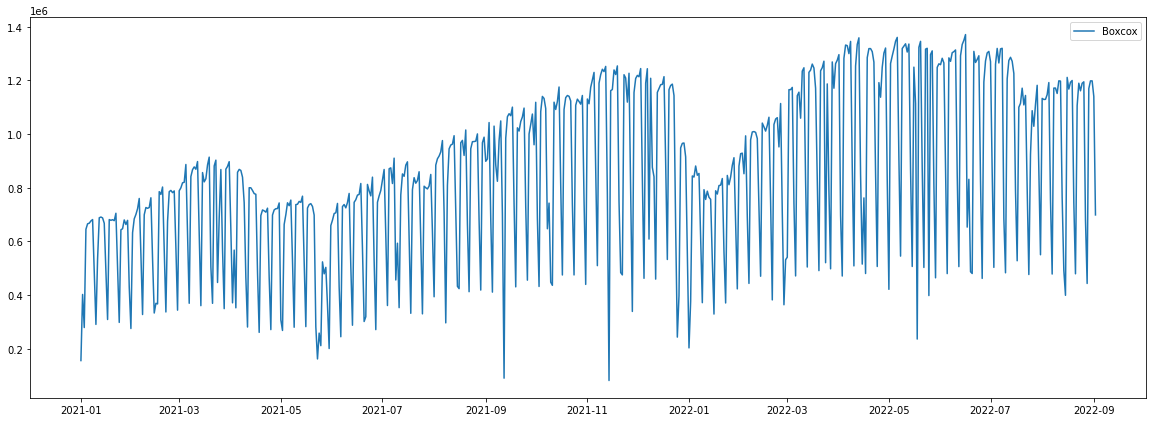

In [35]:
yt, _ = stats.boxcox(y)
plt.figure(figsize=(20,7))
plt.plot(serie["DIA_TRANSPORTE"],yt, label='Boxcox')
plt.legend()

Box Cox le bajó un orden de magnitud.

Logaritmica

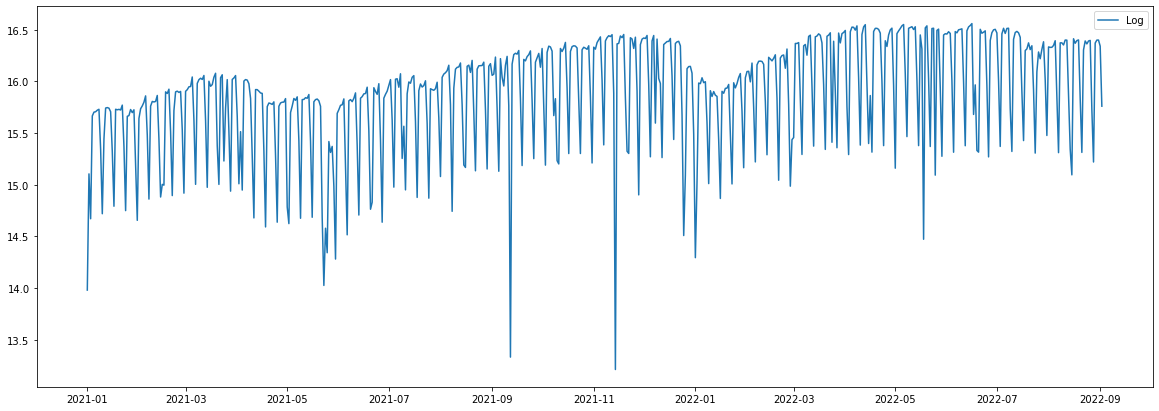

In [36]:
yt = np.log(y)
plt.figure(figsize=(20,7))
plt.plot(serie["DIA_TRANSPORTE"],yt, label='Log')
plt.legend()

Potencia

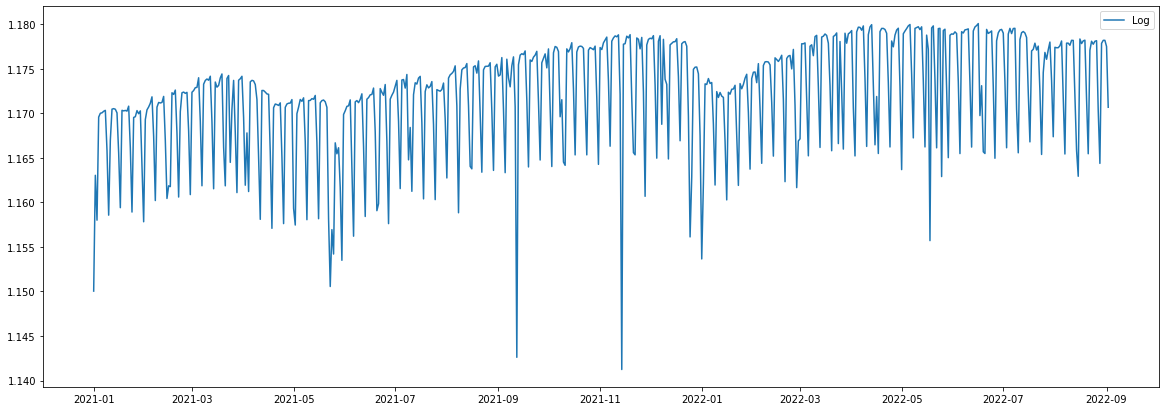

In [37]:
yt = np.power(y, 0.01)
plt.figure(figsize=(20,7))
plt.plot(serie["DIA_TRANSPORTE"],yt, label='Log')
plt.legend()

Diferenciacion

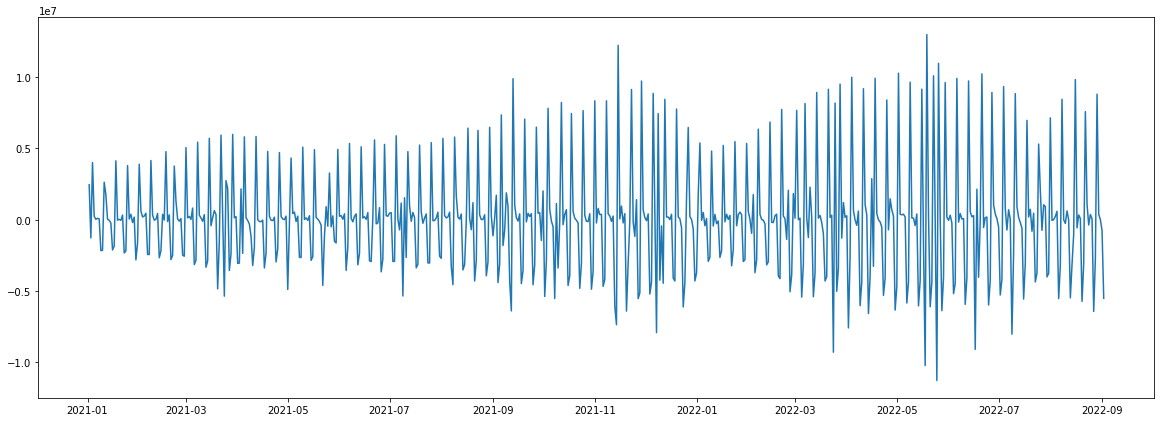

In [38]:
diff = serie[["DIA_TRANSPORTE", "CANTIDAD"]].copy()
diff = diff.set_index("DIA_TRANSPORTE")
diff = diff.diff()
plt.figure(figsize=(20,7))
plt.plot(diff.index, diff["CANTIDAD"])

##### Estacionariedad

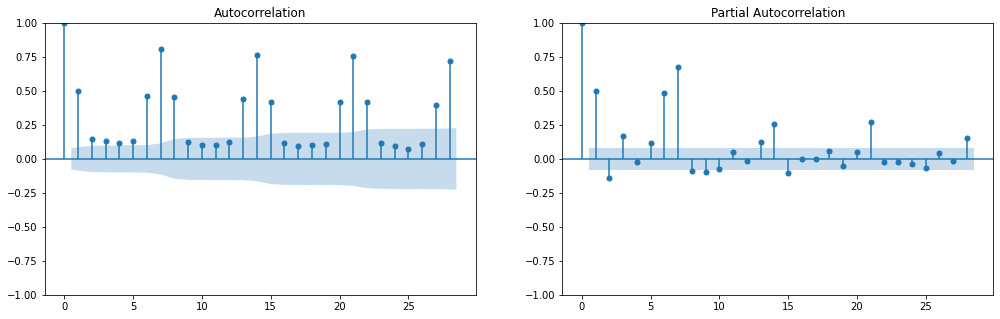

In [63]:
fig, ax = plt.subplots(1,2,figsize=(17,5))
# Decomp es la serie original
plot_acf(decomp, ax=ax[0])
plot_pacf(decomp, ax=ax[1])
plt.show()

La serie no es estacionaria.

##### Pruebo Aplicar transformaciones para llevarla a estacionaria.

* Aplicando transf. de logaritmo

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


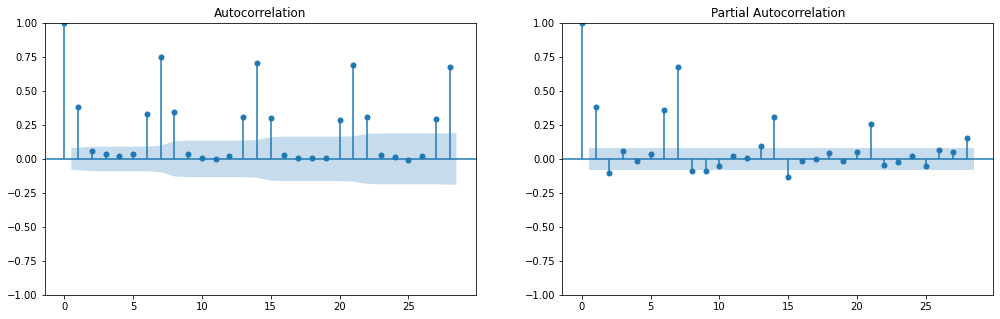

In [64]:
# Decomp2 es aplicando logaritmo
decomp2 = decomp.copy()
decomp2["CANTIDAD"] = np.log(decomp2["CANTIDAD"])
fig, ax = plt.subplots(1,2,figsize=(17,5))
plot_acf(decomp2, ax=ax[0])
plot_pacf(decomp2, ax=ax[1])
plt.show()

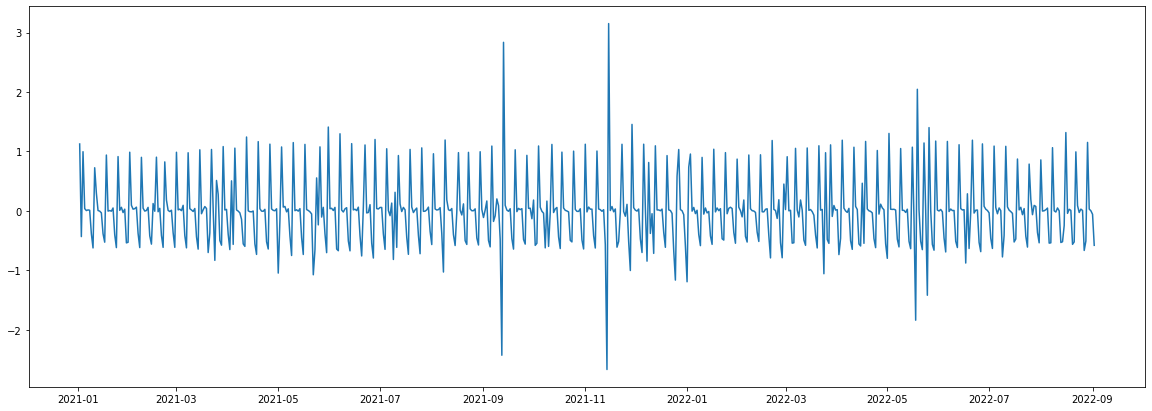

In [41]:
decomp2_diff = decomp2.copy()
decomp2_diff = decomp2_diff.diff()
plt.figure(figsize=(20,7))
plt.plot(decomp2_diff.index, decomp2_diff["CANTIDAD"])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


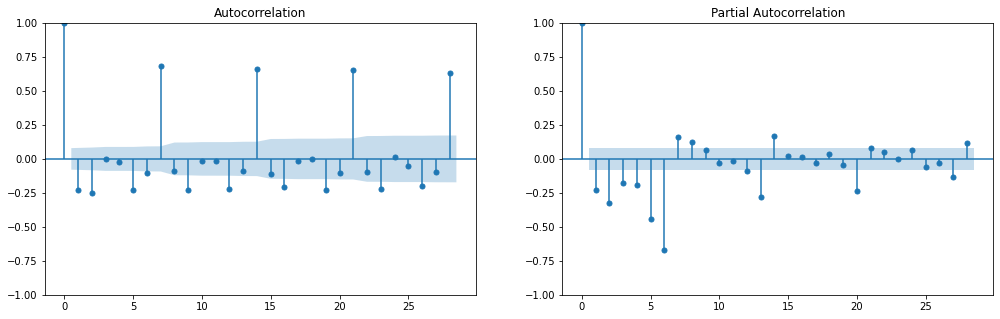

In [65]:
# Decomp2_diff es con logaritmo y diferenciando
fig, ax = plt.subplots(1,2,figsize=(17,5))
plot_acf(decomp2_diff.dropna(), ax=ax[0])
plot_pacf(decomp2_diff.dropna(), ax=ax[1])
plt.show()

* Aplicando Box Cox

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


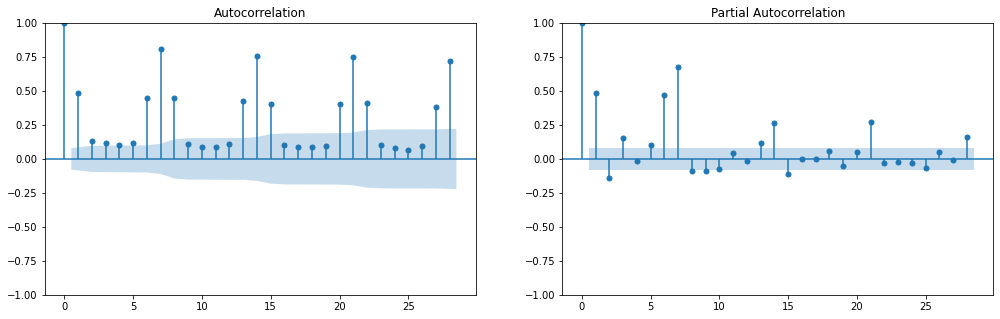

In [66]:
# Decomp3 es aplicando Box Cox
fig, ax = plt.subplots(1,2,figsize=(17,5))
decomp3 = decomp.copy()
decomp3["CANTIDAD"], _ = stats.boxcox(decomp3["CANTIDAD"])
plot_acf(decomp3, ax=ax[0])
plot_pacf(decomp3, ax=ax[1])
plt.show()

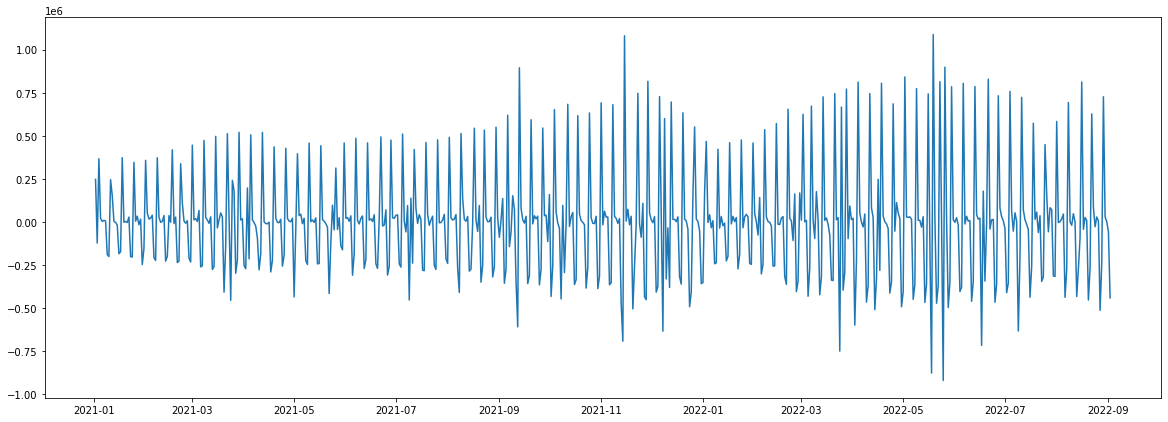

In [44]:
decomp3_diff = decomp3.copy()
decomp3_diff = decomp3_diff.diff()
plt.figure(figsize=(20,7))
plt.plot(decomp3_diff.index, decomp3_diff["CANTIDAD"])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


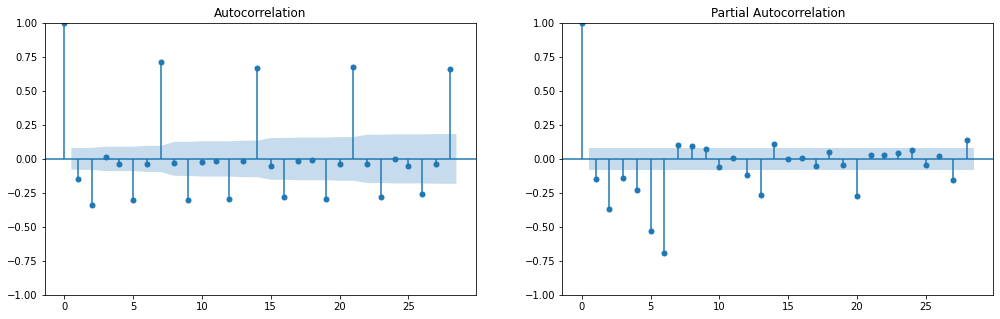

In [67]:
# Decomp3_diff es box cox diferenciada
fig, ax = plt.subplots(1,2,figsize=(17,5))
plot_acf(decomp3_diff.dropna(), ax=ax[0])
plot_pacf(decomp3_diff.dropna(), ax=ax[1])
plt.show()

Si miro el diagrama de autocorrelación sigue sin ser estacionaria, aún luego de haber aplicado Box Cox y diferenciando.

In [46]:
bxcx_adfuller = adfuller(decomp3_diff.dropna())
print(bxcx_adfuller)

(-9.917646479000036, 3.04979964008647e-17, 19, 589, {'1%': -3.4415011513018263, '5%': -2.8664595311890215, '10%': -2.569389981494346}, 15776.942668646381)


In [47]:
bxcx_adfuller[1] < 0.05

True

Segun el test de Dicky Fuller es estacionaria.

In [48]:
bxcx_kpss = kpss(decomp3_diff.dropna())
print(bxcx_kpss)

(0.23366135336230254, 0.1, 149, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [49]:
bxcx_kpss[1] < 0.05

False

Segun el test KPSS es estacionaria.

##### Intento aplicar modelos

Si bien por el gráfico de autocorrelacion la serie no parece ser estacionaria, ambos tests me dieron que sí (uno mira el comportamiento de la varianza y el otro de la media). En este punto asumo que lo que está influyendo en la autocorrelación es la seasonality/estacionalidad. Evalué volver a diferenciar la serie en un orden de 7 (la frecuencia del ciclo - semanal), pero antes voy a intentar modelarla usando SARMA y SARIMA así como está.

* A la que se le aplicó logaritmo

In [70]:
sarimax_decomp2_diff = sm.tsa.statespace.SARIMAX(decomp2_diff).fit(disp=-1)
sarimax_decomp2_diff.summary()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               CANTIDAD   No. Observations:                  610
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -519.625
Date:                Sun, 18 Sep 2022   AIC                           1043.250
Time:                        21:58:13   BIC                           1052.077
Sample:                    01-01-2021   HQIC                          1046.684
                         - 09-02-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2332      0.028     -8.234      0.000      -0.289      -0.178
sigma2         0.3225      0.014     22.787      0.000       0.295       0.350
===================================================================================
Ljung-Box (L1) (Q):                   3.33   Jarque-Bera (JB):                99.52
Prob(Q):                              0.07   Prob(JB):                         0.00
Heteroskedasticity (H):               1.20   Skew:                             0.06
Prob(H) (two-sided):                  0.20   Kurtosis:                         4.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

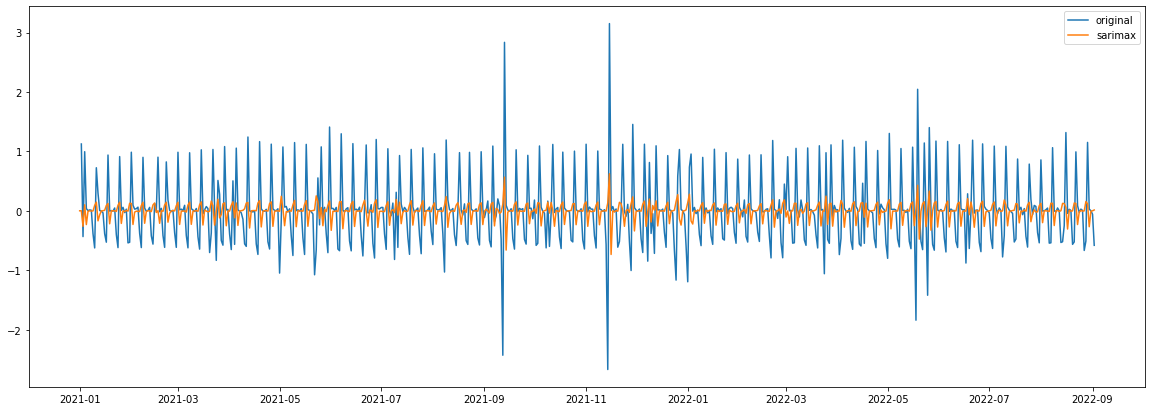

In [74]:
plt.figure(figsize=(20,7))
plt.plot(decomp2_diff.index, decomp2_diff["CANTIDAD"], label='original')
plt.plot(decomp2_diff.index, sarimax_decomp2_diff.fittedvalues, label='sarimax')
plt.legend()

In [78]:
sarimax_decomp2_diff_2 = sm.tsa.statespace.SARIMAX(decomp2_diff, order=(1,0,0), seasonal_order=(1,0,0,7)).fit(disp=-1)
sarimax_decomp2_diff_2.summary()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                          CANTIDAD   No. Observations:                  610
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 7)   Log Likelihood                -285.440
Date:                           Sun, 18 Sep 2022   AIC                            576.881
Time:                                   22:59:42   BIC                            590.121
Sample:                               01-01-2021   HQIC                           582.031
                                    - 09-02-2022                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4130      0.020    -21.007      0.000      -0.452      -0.374
ar.S.L7        0.7453      0.018     41.857      0.000       0.710       0.780
sigma2         0.1481      0.004     34.666      0.000       0.140       0.156
===================================================================================
Ljung-Box (L1) (Q):                   8.99   Jarque-Bera (JB):              1020.85
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.31   Skew:                            -0.58
Prob(H) (two-sided):                  0.05   Kurtosis:                         9.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

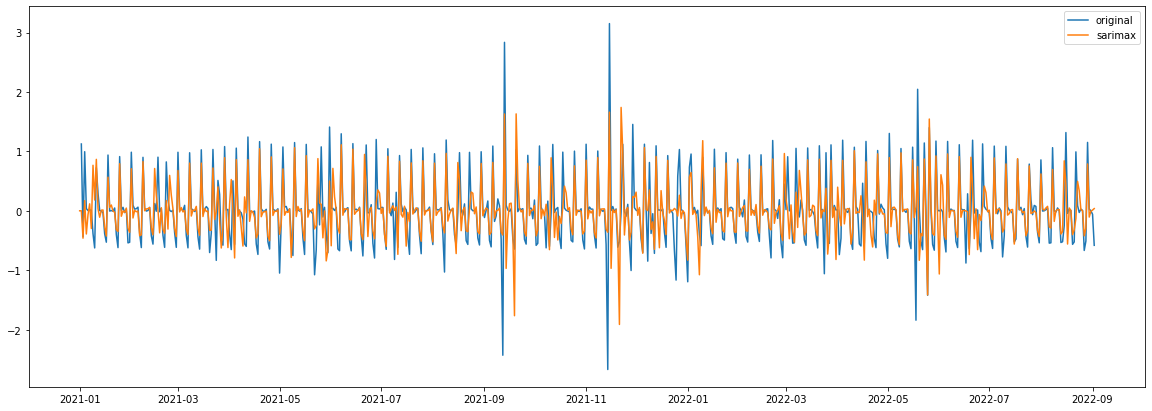

In [79]:
plt.figure(figsize=(20,7))
plt.plot(decomp2_diff.index, decomp2_diff["CANTIDAD"], label='original')
plt.plot(decomp2_diff.index, sarimax_decomp2_diff_2.fittedvalues, label='sarimax')
plt.legend()

* A la que se le aplicó Box Cox

In [75]:
sarimax_decomp3_diff = sm.tsa.statespace.SARIMAX(decomp3_diff).fit(disp=-1)
sarimax_decomp3_diff.summary()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               CANTIDAD   No. Observations:                  610
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -8559.807
Date:                Sun, 18 Sep 2022   AIC                          17123.613
Time:                        22:47:37   BIC                          17132.440
Sample:                    01-01-2021   HQIC                         17127.047
                         - 09-02-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1517      0.037     -4.109      0.000      -0.224      -0.079
sigma2      9.468e+10   1.44e-13   6.59e+23      0.000    9.47e+10    9.47e+10
===================================================================================
Ljung-Box (L1) (Q):                   1.94   Jarque-Bera (JB):                27.46
Prob(Q):                              0.16   Prob(JB):                         0.00
Heteroskedasticity (H):               3.02   Skew:                             0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

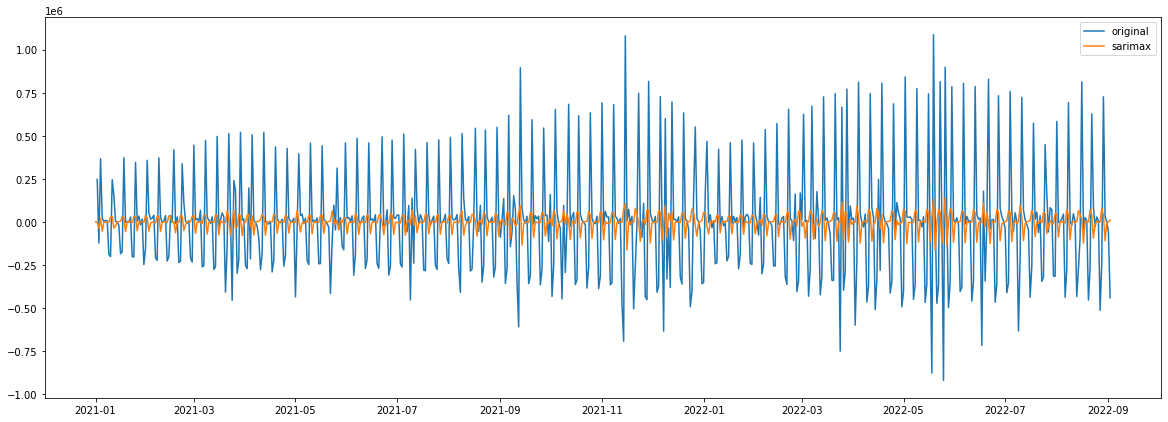

In [76]:
plt.figure(figsize=(20,7))
plt.plot(decomp3_diff.index, decomp3_diff["CANTIDAD"], label='original')
plt.plot(decomp3_diff.index, sarimax_decomp3_diff.fittedvalues, label='sarimax')
plt.legend()

In [82]:
sarimax_decomp3_diff_2 = sm.tsa.statespace.SARIMAX(decomp3_diff, order=(1,0,0), seasonal_order=(1,0,0,7)).fit(disp=-1)
sarimax_decomp3_diff_2.summary()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                          CANTIDAD   No. Observations:                  610
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 7)   Log Likelihood               -8385.742
Date:                           Sun, 18 Sep 2022   AIC                          16777.484
Time:                                   23:03:45   BIC                          16790.725
Sample:                               01-01-2021   HQIC                         16782.635
                                    - 09-02-2022                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3883      0.057     -6.771      0.000      -0.501      -0.276
ar.S.L7        0.7662      0.049     15.516      0.000       0.669       0.863
sigma2      9.468e+10   1.34e-13   7.06e+23      0.000    9.47e+10    9.47e+10
===================================================================================
Ljung-Box (L1) (Q):                  10.73   Jarque-Bera (JB):               340.63
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.07   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.88e+38. Standard errors may be unstable.
"""

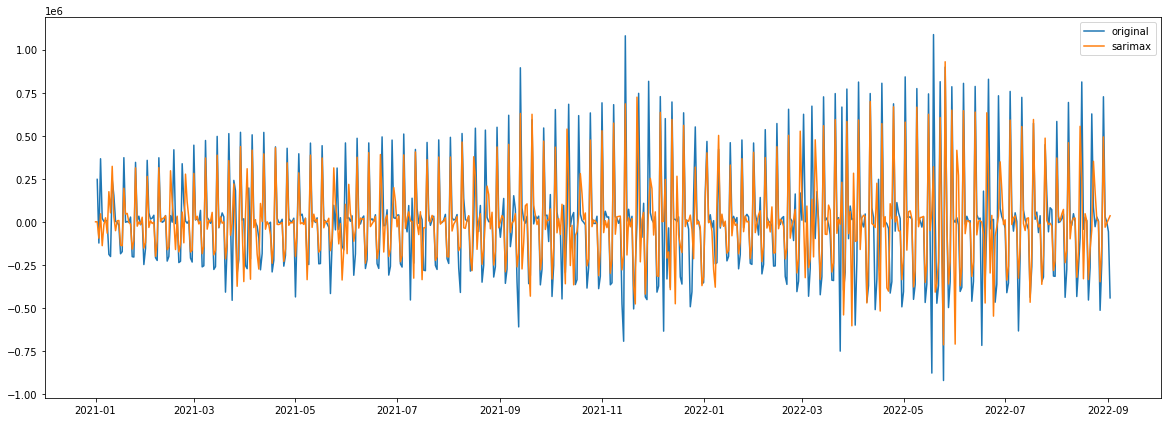

In [83]:
plt.figure(figsize=(20,7))
plt.plot(decomp3_diff.index, decomp3_diff["CANTIDAD"], label='original')
plt.plot(decomp3_diff.index, sarimax_decomp3_diff_2.fittedvalues, label='sarimax')
plt.legend()